In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a = pd.read_excel("atlas2013_dadosbrutos_pt.xlsx", sheet_name=2)
a.groupby(a['UFN']).get_group('Paraíba')

,ANO,UF,UFN,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,SOBRE40,SOBRE60,...,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
11,1991,25,Paraíba,58.88,3.78,74.47,96.98,79.92,80.99,62.25,...,NaN,NaN,3168772,3124960,0.206,0.184,0.382,0.191,0.565,0.515
38,2000,25,Paraíba,65.34,2.54,43.30,55.60,63.08,86.59,72.16,...,238820.0,2122073.0,3416589,3289392,0.269,0.367,0.506,0.331,0.672,0.582
65,2010,25,Paraíba,72.00,1.95,21.67,23.42,51.14,94.94,85.12,...,215244.0,2597404.0,3744722,3706991,0.426,0.634,0.658,0.555,0.783,0.656


In [3]:
atlas = pd.read_excel("atlas2013_dadosbrutos_pt.xlsx", sheet_name=1, 
          usecols=['ANO', 'UF', 'Município', 'ESPVIDA', 'FECTOT', 'MORT1', 'SOBRE60', 'T_ENV', 'E_ANOSESTUDO', 'T_ANALF11A14', 'T_ANALF25M', 'T_ATRASO_0_BASICO', 'T_ATRASO_2_BASICO', 'T_FLPRE', 'T_FLSUPER', 'T_FREQSUPER1517', 'T_SUPER25M', 'T_MED25M', 'GINI', 'PIND', 'PINDCRI', 'PMPOB', 'PMPOBCRI', 'RDPC', 'CPR', 'EMP', 'P_AGRO', 'P_COM', 'P_CONSTR', 'P_EXTR', 'P_FORMAL', 'P_FUND', 'P_MED', 'P_SERV', 'P_SIUP', 'P_SUPER', 'T_DES2529', 'TRABCC', 'TRABPUB', 'TRABSC', 'T_AGUA', 'T_BANAGUA', 'T_DENS', 'T_LIXO', 'T_LUZ', 'AGUA_ESGOTO', 'PAREDE', 'T_CRIFUNDIN_TODOS', 'T_FORA4A5', 'T_FORA6A14', 'T_FUNDIN_TODOS', 'T_FUNDIN_TODOS_MMEIO', 'T_FUNDIN18MINF', 'T_M10A14CF', 'T_M15A17CF', 'T_MULCHEFEFIF014', 'T_NESTUDA_NTRAB_MMEIO', 'T_OCUPDESLOC_1', 'T_RMAXIDOSO', 'T_SLUZ', 'HOMEMTOT', 'MULHERTOT', 'pesoRUR', 'pesotot', 'pesourb', 'POP', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R'], 
          dtype={'UF': str}).rename(columns={'ESPVIDA': 'expec_vida', 'FECTOT': 'taxa_fecund', 'SOBRE60': '%sobreviver_60a', 'T_ENV': 'taxa_envelh', 'E_ANOSESTUDO': 'expec_anos_estudo_18'})
atlaspb = atlas.groupby(atlas['UF']).get_group('25').loc[(atlas['ANO'] == 2010)]
atlaspb_anos = atlas.groupby(atlas['UF']).get_group('25')
atlaspb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 12371 to 12593
Data columns (total 70 columns):
ANO                      223 non-null int64
UF                       223 non-null object
Município                223 non-null object
expec_vida               223 non-null float64
taxa_fecund              223 non-null float64
MORT1                    223 non-null float64
%sobreviver_60a          223 non-null float64
taxa_envelh              223 non-null float64
expec_anos_estudo_18     223 non-null float64
T_ANALF11A14             223 non-null float64
T_ANALF25M               223 non-null float64
T_ATRASO_0_BASICO        223 non-null float64
T_ATRASO_2_BASICO        223 non-null float64
T_FLPRE                  223 non-null float64
T_FLSUPER                223 non-null float64
T_FREQSUPER1517          223 non-null float64
T_MED25M                 223 non-null float64
T_SUPER25M               223 non-null float64
GINI                     223 non-null float64
PIND               

### Expectativa de vida dos municípios com maior e menor IDHM

In [4]:
maior_idhm = atlaspb.sort_values('IDHM', ascending=False)
ma_idhm = maior_idhm[['Município','IDHM','expec_vida']]
ma_idhm[:10].style.set_caption("Expectativa de vida dos municípios com maior IDHM")

,Município,IDHM,expec_vida
12466,JOÃO PESSOA,0.763,74.89
12412,CABEDELO,0.748,74.31
12422,CAMPINA GRANDE,0.72,73.73
12591,VÁRZEA,0.707,73.01
12506,PATOS,0.701,74.26
12541,SANTA LUZIA,0.682,73.23
12418,CAJAZEIRAS,0.679,73.87
12454,GUARABIRA,0.673,73.73
12581,SOUSA,0.668,73.84
12401,BOA VISTA,0.649,72.73


In [5]:
menor_idhm = atlaspb.sort_values('IDHM')
me_idhm = menor_idhm[['Município','IDHM','expec_vida']]
me_idhm[:10].style.set_caption("Expectativa de vida dos municípios com menor IDHM")

,Município,IDHM,expec_vida
12453,GADO BRAVO,0.513,69.22
12426,CASSERENGUE,0.514,68.81
12443,DAMIÃO,0.521,68.2
12416,CACIMBAS,0.523,65.3
12440,CUITÉ DE MAMANGUAPE,0.524,65.96
12519,POÇO DANTAS,0.525,67.14
12537,SANTA CECÍLIA,0.525,66.94
12483,MARCAÇÃO,0.529,66.43
12441,CURRAL DE CIMA,0.529,67.89
12555,SÃO JOSÉ DA LAGOA TAPADA,0.53,68.34


### Comparação da expectativa de vida de Cruz e João Pessoa

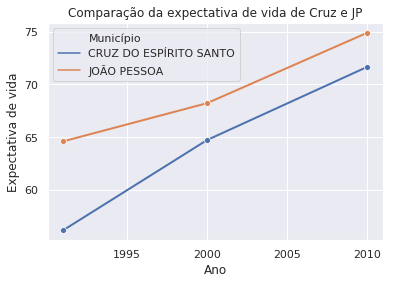

In [6]:
sns.set()
jpcruz = atlaspb_anos[atlaspb_anos["Município"].str.contains("CRUZ DO ESPÍRITO SANTO|JOÃO PESSOA")]
sns.lineplot(x="ANO", y="expec_vida", marker='o', linewidth=2, hue="Município", data=jpcruz)
plt.title("Comparação da expectativa de vida de Cruz e JP")
plt.ylabel('Expectativa de vida')
plt.xlabel('Ano')
sns.set_context("talk")

### Índices de renda dos municípios com maiores e menores taxas de mortalidade (crianças que não deverão sobreviver ao primeiro ano de vida em cada 1000 crianças nascidas vivas)

In [7]:
maior_mortalidade = atlaspb.sort_values('MORT1', ascending=False)
maior_mor = maior_mortalidade[['Município','MORT1', 'IDHM_R','ANO']]
maior_mor[:10].style.set_caption("IDHMR dos municípios com maiores taxas de mortalidade")

,Município,MORT1,IDHM_R,ANO
12416,CACIMBAS,44,0.501,2010
12487,MATARACA,43.3,0.533,2010
12470,JURIPIRANGA,42.7,0.544,2010
12386,AREIA DE BARAÚNAS,42,0.566,2010
12440,CUITÉ DE MAMANGUAPE,41.4,0.529,2010
12447,DONA INÊS,39.7,0.524,2010
12483,MARCAÇÃO,39.6,0.525,2010
12484,MARI,39.3,0.553,2010
12482,MANAÍRA,38,0.537,2010
12537,SANTA CECÍLIA,37.7,0.515,2010


In [8]:
menor_mortalidade = atlaspb.sort_values('MORT1')
menor_mor = menor_mortalidade[['Município','MORT1', 'IDHM_R']]
menor_mor[:10].style.set_caption("IDHMR dos municípios com menores taxas de mortalidade")

,Município,MORT1,IDHM_R
12506,PATOS,15.27,0.667
12412,CABEDELO,16,0.782
12546,SANTA TERESINHA,16.2,0.586
12581,SOUSA,16.24,0.645
12466,JOÃO PESSOA,16.44,0.77
12418,CAJAZEIRAS,17,0.668
12422,CAMPINA GRANDE,17.3,0.702
12454,GUARABIRA,17.3,0.641
12541,SANTA LUZIA,18.5,0.62
12515,PILÕEZINHOS,18.7,0.532


### Índices de educação dos municípios com maiores e menores taxas de fecundidade (número médio de filhos que uma mulher deverá ter ao terminar o período reprodutivo)

In [9]:
maior_fecundidade = atlaspb.sort_values('taxa_fecund', ascending=False)
maior_fec = maior_fecundidade[['Município','taxa_fecund', 'IDHM_E']]
maior_fec[:10].style.set_caption("IDHME dos municípios com maiores taxas de fecundidade")

,Município,taxa_fecund,IDHM_E
12483,MARCAÇÃO,3.21,0.408
12390,BAÍA DA TRAIÇÃO,3.21,0.495
12487,MATARACA,2.97,0.427
12416,CACIMBAS,2.92,0.425
12423,CAPIM,2.92,0.4
12517,PITIMBU,2.88,0.456
12482,MANAÍRA,2.87,0.426
12478,LUCENA,2.87,0.469
12580,SOSSÊGO,2.85,0.46
12530,RIACHÃO DO BACAMARTE,2.73,0.417


In [10]:
menor_fecundidade = atlaspb.sort_values('taxa_fecund')
menor_fec = menor_fecundidade[['Município','taxa_fecund', 'IDHM_E']]
menor_fec[:10].style.set_caption("IDHME dos municípios com menores taxas de fecundidade")

,Município,taxa_fecund,IDHM_E
12591,VÁRZEA,1.49,0.714
12466,JOÃO PESSOA,1.49,0.693
12456,GURJÃO,1.59,0.581
12544,SANTARÉM,1.6,0.568
12445,VISTA SERRANA,1.6,0.424
12475,LASTRO,1.62,0.38
12454,GUARABIRA,1.62,0.586
12448,DUAS ESTRADAS,1.65,0.488
12588,TRIUNFO,1.65,0.501
12592,VIEIRÓPOLIS,1.66,0.455


### Índices de renda dos municípios com mais e menos analfabetos de 11 a 14 anos (pessoas que não sabem ler nem escrever um bilhete simples)

In [11]:
menos_analf_11a14 = atlaspb.sort_values('T_ANALF11A14')
menos_analf_11a14 = menos_analf_11a14[['Município','T_ANALF11A14', 'IDHM_R']]
menos_analf_11a14[:10].style.set_caption("IDHMR dos municípios com mais analfabetos de 11 a 14 anos")

,Município,T_ANALF11A14,IDHM_R
12435,COXIXOLA,0,0.586
12532,RIACHO DE SANTO ANTÔNIO,0.68,0.569
12549,SÃO BENTINHO,1.06,0.575
12401,BOA VISTA,1.57,0.59
12387,AREIAL,1.58,0.573
12500,NOVA PALMEIRA,1.59,0.567
12502,OLIVEDOS,1.86,0.531
12591,VÁRZEA,2.01,0.619
12452,FREI MARTINHO,2.04,0.631
12504,PARARI,2.08,0.583


In [12]:
mais_analf_11a14 = atlaspb.sort_values('T_ANALF11A14', ascending=False)
mais_analf_11a14 = mais_analf_11a14[['Município','T_ANALF11A14', 'IDHM_R']]
mais_analf_11a14[:10].style.set_caption("IDHMR dos municípios com menos analfabetos de 11 a 14 anos")

,Município,T_ANALF11A14,IDHM_R
12440,CUITÉ DE MAMANGUAPE,15.3,0.529
12530,RIACHÃO DO BACAMARTE,15,0.561
12482,MANAÍRA,14.83,0.537
12442,CURRAL VELHO,13.3,0.613
12483,MARCAÇÃO,13.23,0.525
12423,CAPIM,13.17,0.52
12566,SÃO MIGUEL DE TAIPU,12.9,0.516
12430,CONCEIÇÃO,12.84,0.577
12587,TENÓRIO,12.72,0.565
12519,POÇO DANTAS,12.65,0.506


### Índices de renda dos municípios com mais e menos pessoas de 6 a 17 anos frequentando o ensino básico regular seriado (fundamental + médio) sem atraso idade-série (estão nas séries certinhas começando com 5 anos)

In [13]:
maior_sem_atraso = atlaspb.sort_values('T_ATRASO_0_BASICO', ascending=False)
maior_sem_atraso = maior_sem_atraso[['Município','T_ATRASO_0_BASICO', 'IDHM_R']]
maior_sem_atraso[:10].style.set_caption("IDHMR dos municípios com mais pessoas de 6 a 17 anos sem atraso idade-série")

,Município,T_ATRASO_0_BASICO,IDHM_R
12591,VÁRZEA,76.75,0.619
12593,ZABELÊ,73.19,0.567
12409,BREJO DOS SANTOS,69.4,0.564
12526,QUIXABÁ,68.99,0.564
12403,BOM SUCESSO,68.54,0.558
12506,PATOS,67.79,0.667
12541,SANTA LUZIA,66.05,0.62
12494,MONTEIRO,65.06,0.625
12552,SÃO FRANCISCO,65.03,0.56
12401,BOA VISTA,64.48,0.59


In [14]:
menor_sem_atraso = atlaspb.sort_values('T_ATRASO_0_BASICO')
menor_sem_atraso = menor_sem_atraso[['Município','T_ATRASO_0_BASICO', 'IDHM_R']]
menor_sem_atraso[:10].style.set_caption("IDHMR dos municípios com menos pessoas de 6 a 17 anos sem atraso idade-série")

,Município,T_ATRASO_0_BASICO,IDHM_R
12440,CUITÉ DE MAMANGUAPE,30.93,0.529
12441,CURRAL DE CIMA,37.75,0.528
12373,ALAGOA GRANDE,37.98,0.576
12556,SÃO JOSÉ DE CAIANA,38.19,0.545
12487,MATARACA,39.06,0.533
12388,AROEIRAS,39.53,0.537
12515,PILÕEZINHOS,39.74,0.532
12554,SÃO JOÃO DO TIGRE,39.92,0.523
12483,MARCAÇÃO,39.96,0.525
12575,SERRARIA,40.17,0.536


### Índices de renda dos municípios com mais e menos pessoas de 6 a 17 anos frequentando o ensino básico regular seriado (fundamental + médio) com atraso idade-série de 2 anos (estão 2 anos atrasados nas séries começando com 5 anos)

In [15]:
maior_atraso2 = atlaspb.sort_values('T_ATRASO_2_BASICO', ascending=False)
maior_atr2 = maior_atraso2[['Município','T_ATRASO_2_BASICO', 'IDHM_R']]
maior_atr2[:10].style.set_caption("IDHMR dos municípios com mais pessoas de 6 a 17 anos com atraso idade-série de 2 anos")

,Município,T_ATRASO_2_BASICO,IDHM_R
12440,CUITÉ DE MAMANGUAPE,47.92,0.529
12441,CURRAL DE CIMA,42.11,0.528
12483,MARCAÇÃO,41.97,0.525
12514,PILÕES,41.09,0.559
12495,MULUNGU,40.55,0.548
12373,ALAGOA GRANDE,38.69,0.576
12404,BONITO DE SANTA FÉ,38.68,0.564
12382,ARAÇAGI,38.12,0.54
12455,GURINHÉM,38.02,0.544
12487,MATARACA,37.96,0.533


In [16]:
menor_atraso2 = atlaspb.sort_values('T_ATRASO_2_BASICO')
menor_atr2 = menor_atraso2[['Município','T_ATRASO_2_BASICO', 'IDHM_R']]
menor_atr2[:10].style.set_caption("IDHMR dos municípios com menos pessoas de 6 a 17 anos com atraso idade-série de 2 anos")

,Município,T_ATRASO_2_BASICO,IDHM_R
12591,VÁRZEA,9.88,0.619
12593,ZABELÊ,10.53,0.567
12541,SANTA LUZIA,15.04,0.62
12526,QUIXABÁ,15.06,0.564
12452,FREI MARTINHO,15.8,0.631
12450,ESPERANÇA,16.3,0.598
12409,BREJO DOS SANTOS,16.99,0.564
12401,BOA VISTA,17.13,0.59
12552,SÃO FRANCISCO,17.38,0.56
12494,MONTEIRO,17.68,0.625


### Índices de longevidade dos municípios com mais pessoas de 15 a 17 e de 18 a 24 anos frequentando o ensino superior

In [17]:
menos_superior_15a17 = atlaspb.sort_values('T_FREQSUPER1517', ascending=False)
menos_sup_15a17 = menos_superior_15a17[['Município','T_FREQSUPER1517', 'IDHM_L']]
menos_sup_15a17[:10].style.set_caption("IDHML dos municípios com mais pessoas de 15 a 17 anos frequentando o ensino superior")

,Município,T_FREQSUPER1517,IDHM_L
12591,VÁRZEA,6.29,0.8
12425,CARRAPATEIRA,4.8,0.765
12507,PAULISTA,4.44,0.747
12535,SALGADINHO,3.27,0.739
12419,CAJAZEIRINHAS,3.12,0.773
12506,PATOS,3.01,0.821
12528,PEDRO RÉGIS,3,0.754
12500,NOVA PALMEIRA,2.96,0.762
12503,OURO VELHO,2.87,0.764
12540,SANTA INÊS,2.87,0.706


In [18]:
mais_superior_18a24 = atlaspb.sort_values('T_FLSUPER', ascending=False)
mais_sup_18a24 = mais_superior_18a24[['Município','T_FLSUPER', 'IDHM_L']]
mais_sup_18a24[:10].style.set_caption("IDHML dos municípios com mais pessoas de 18 a 24 anos frequentando o ensino superior")

,Município,T_FLSUPER,IDHM_L
12466,JOÃO PESSOA,23,0.832
12422,CAMPINA GRANDE,20.16,0.812
12418,CAJAZEIRAS,18.69,0.815
12412,CABEDELO,18.21,0.822
12425,CARRAPATEIRA,16.41,0.765
12582,SUMÉ,15.65,0.765
12409,BREJO DOS SANTOS,15.01,0.776
12581,SOUSA,14.93,0.814
12504,PARARI,14.88,0.733
12565,SÃO MAMEDE,14.42,0.765


### Índices de longevidade dos municípios onde mais e menos pessoas concluíram o ensino médio com 25+ anos

In [19]:
mais_ensmedio25 = atlaspb.sort_values('T_MED25M', ascending=False)
mais_em25 = mais_ensmedio25[['Município','T_MED25M', 'IDHM_L','ANO']]
mais_em25[:10].style.set_caption("IDHML dos municípios onde mais pessoas concluíram o ensino médio com 25 anos ou mais")

,Município,T_MED25M,IDHM_L,ANO
12466,JOÃO PESSOA,49.91,0.832,2010
12412,CABEDELO,40.36,0.822,2010
12422,CAMPINA GRANDE,39.73,0.812,2010
12506,PATOS,31.69,0.821,2010
12541,SANTA LUZIA,30.02,0.804,2010
12454,GUARABIRA,29.54,0.812,2010
12591,VÁRZEA,29.02,0.8,2010
12418,CAJAZEIRAS,26.19,0.815,2010
12396,BAYEUX,25.33,0.779,2010
12581,SOUSA,24.36,0.814,2010


In [20]:
menos_ensmedio25 = atlaspb.sort_values('T_MED25M')
menos_em25 = menos_ensmedio25[['Município','T_MED25M', 'IDHM_L','ANO']]
menos_em25[:10].style.set_caption("IDHML dos municípios onde menos pessoas concluíram o ensino médio com 25 anos ou mais")

,Município,T_MED25M,IDHM_L,ANO
12426,CASSERENGUE,5.1,0.73,2010
12453,GADO BRAVO,7.09,0.737,2010
12443,DAMIÃO,7.44,0.72,2010
12564,SÃO JOSÉ DOS CORDEIROS,7.81,0.778,2010
12475,LASTRO,7.94,0.747,2010
12488,MATINHAS,7.95,0.747,2010
12528,PEDRO RÉGIS,8.46,0.754,2010
12489,MATO GROSSO,8.48,0.76,2010
12551,SÃO DOMINGOS,8.56,0.754,2010
12423,CAPIM,8.62,0.728,2010


### Longevidade dos municípios com maiores e menores Gini (0 corresponde à completa igualdade (no caso do rendimento, por exemplo, toda a população recebe o mesmo salário) e 1 corresponde à completa desigualdade (onde uma pessoa recebe todo o rendimento e as demais nada recebem))

In [21]:
maior_gini = atlaspb.sort_values('GINI', ascending=False)
ma_gini = maior_gini[['Município','GINI', 'IDHM_L']]
ma_gini[:10].style.set_caption("IDHML dos municípios com maiores GINI")

,Município,GINI,IDHM_L
12412,CABEDELO,0.7,0.822
12372,AGUIAR,0.65,0.753
12466,JOÃO PESSOA,0.62,0.832
12391,BANANEIRAS,0.59,0.766
12442,CURRAL VELHO,0.59,0.739
12514,PILÕES,0.59,0.767
12546,SANTA TERESINHA,0.59,0.82
12422,CAMPINA GRANDE,0.58,0.812
12390,BAÍA DA TRAIÇÃO,0.58,0.731
12388,AROEIRAS,0.58,0.745


In [22]:
menor_gini = atlaspb.sort_values('GINI')
me_gini = menor_gini[['Município','GINI', 'IDHM_L']]
me_gini[:10].style.set_caption("IDHML dos municípios com menores GINI")

,Município,GINI,IDHM_L
12591,VÁRZEA,0.4,0.8
12401,BOA VISTA,0.42,0.796
12477,LOGRADOURO,0.42,0.776
12515,PILÕEZINHOS,0.43,0.802
12436,CRUZ DO ESPÍRITO SANTO,0.43,0.778
12593,ZABELÊ,0.43,0.725
12563,SÃO JOSÉ DO SABUGI,0.43,0.781
12587,TENÓRIO,0.43,0.707
12532,RIACHO DE SANTO ANTÔNIO,0.43,0.735
12488,MATINHAS,0.44,0.747


### Índices de longevidade dos municípios com maior e menor proporção de pessoas com renda domiciliar per capita igual ou inferior a R$ 70,00 mensais

In [23]:
maior_extrema_pobreza = atlaspb.sort_values('PIND', ascending=False)
ma_extpob = maior_extrema_pobreza[['Município','PIND', 'IDHM_L']]
ma_extpob[:10].style.set_caption("IDHML dos municípios com maior proporção de pessoas vivendo em extrema pobreza")

,Município,PIND,IDHM_L
12426,CASSERENGUE,43.17,0.73
12542,SANTANA DE MANGUEIRA,38.59,0.756
12453,GADO BRAVO,37.6,0.737
12416,CACIMBAS,36.97,0.672
12447,DONA INÊS,36.05,0.69
12388,AROEIRAS,33.96,0.745
12399,BERNARDINO BATISTA,33.94,0.716
12496,NATUBA,33.3,0.71
12482,MANAÍRA,32.63,0.698
12443,DAMIÃO,32.36,0.72


In [24]:
menor_extrema_pobreza = atlaspb.sort_values('PIND')
me_extpob = menor_extrema_pobreza[['Município','PIND', 'IDHM_L','ANO']]
me_extpob[:10].style.set_caption("IDHML dos municípios com menor proporção de pessoas vivendo em extrema pobreza")

,Município,PIND,IDHM_L,ANO
12466,JOÃO PESSOA,3.48,0.832,2010
12422,CAMPINA GRANDE,5.02,0.812,2010
12412,CABEDELO,5.27,0.822,2010
12506,PATOS,5.38,0.821,2010
12591,VÁRZEA,6.76,0.8,2010
12396,BAYEUX,6.86,0.779,2010
12548,SÃO BENTO,7.37,0.769,2010
12454,GUARABIRA,7.55,0.812,2010
12563,SÃO JOSÉ DO SABUGI,7.69,0.781,2010
12545,SANTA RITA,8.91,0.774,2010


### Índices de educação dos municípios com mais e menos trabalhadores por conta própria de 18 anos ou mais de idade 

In [25]:
mais_autonomos = atlaspb.sort_values('CPR', ascending=False)
mais_aut = mais_autonomos[['Município','CPR', 'IDHM_E']]
mais_aut[:10].style.set_caption("IDHME dos municípios com mais trabalhadores por conta própria de 18 anos ou mais de idade")

,Município,CPR,IDHM_E
12488,MATINHAS,44.71,0.4
12568,SÃO SEBASTIÃO DO UMBUZEIRO,41.16,0.459
12429,CATURITÉ,38.26,0.502
12540,SANTA INÊS,36.36,0.492
12395,BARRA DE SÃO MIGUEL,34.94,0.44
12517,PITIMBU,34.45,0.456
12430,CONCEIÇÃO,34.31,0.476
12405,BOQUEIRÃO,34.22,0.496
12554,SÃO JOÃO DO TIGRE,33.57,0.424
12526,QUIXABÁ,33.25,0.579


In [26]:
menos_autonomos = atlaspb.sort_values('CPR', ascending=False)
menos_aut = menos_autonomos[['Município','CPR', 'IDHM_E']]
menos_aut[:10].style.set_caption("IDHME dos municípios com menos trabalhadores por conta própria de 18 anos ou mais de idade")

,Município,CPR,IDHM_E
12488,MATINHAS,44.71,0.4
12568,SÃO SEBASTIÃO DO UMBUZEIRO,41.16,0.459
12429,CATURITÉ,38.26,0.502
12540,SANTA INÊS,36.36,0.492
12395,BARRA DE SÃO MIGUEL,34.94,0.44
12517,PITIMBU,34.45,0.456
12430,CONCEIÇÃO,34.31,0.476
12405,BOQUEIRÃO,34.22,0.496
12554,SÃO JOÃO DO TIGRE,33.57,0.424
12526,QUIXABÁ,33.25,0.579


### Índices de educação dos municípios com mais empregadores de 18 anos ou mais de idade

In [27]:
mais_empregadores = atlaspb.sort_values('EMP', ascending=False)
mais_emp = mais_empregadores[['Município','EMP', 'IDHM_E']]
mais_emp[:10].style.set_caption("IDHME dos municípios com mais empregadores de 18 anos ou mais de idade")

,Município,EMP,IDHM_E
12465,JERICÓ,3.73,0.476
12412,CABEDELO,2.97,0.651
12454,GUARABIRA,2.71,0.586
12422,CAMPINA GRANDE,2.68,0.654
12506,PATOS,2.46,0.628
12588,TRIUNFO,2.43,0.501
12565,SÃO MAMEDE,2.37,0.558
12406,IGARACY,2.22,0.496
12466,JOÃO PESSOA,2.17,0.693
12589,UIRAÚNA,2.08,0.528



### Índices de longevidade dos municípios com maior e menor percentual de pessoas desempregadas de 25 a 29 anos

In [28]:
mais_desemprego = atlaspb.sort_values('T_DES2529', ascending=False)
mais_des = mais_desemprego[['Município','T_DES2529', 'IDHM_L']]
mais_des[:10].style.set_caption("IDHML dos municípios com maior percentual de pessoas desempregadas de 25 a 29 anos")

,Município,T_DES2529,IDHM_L
12475,LASTRO,30.24,0.747
12423,CAPIM,27.61,0.728
12508,PEDRA BRANCA,24.16,0.761
12480,MALTA,21.3,0.8
12409,BREJO DOS SANTOS,20.95,0.776
12562,SÃO JOSÉ DO BREJO DO CRUZ,20.95,0.776
12442,CURRAL VELHO,20.87,0.739
12526,QUIXABÁ,20.69,0.737
12465,JERICÓ,19.86,0.798
12487,MATARACA,19.81,0.675


In [29]:
menos_desemprego = atlaspb.sort_values('T_DES2529')
menos_des = menos_desemprego[['Município','T_DES2529', 'IDHM_L']]
menos_des[:10].style.set_caption("IDHML dos municípios com menor percentual de pessoas desempregadas de 25 a 29 anos")

,Município,T_DES2529,IDHM_L
12532,RIACHO DE SANTO ANTÔNIO,0,0.735
12492,MONTADAS,0.97,0.748
12425,CARRAPATEIRA,0.99,0.765
12395,BARRA DE SÃO MIGUEL,1.09,0.728
12429,CATURITÉ,1.35,0.782
12591,VÁRZEA,1.68,0.8
12458,IMACULADA,1.73,0.715
12556,SÃO JOSÉ DE CAIANA,1.76,0.762
12560,SÃO JOSÉ DE PRINCESA,1.81,0.765
12500,NOVA PALMEIRA,1.91,0.762


### Índices de longevidade dos municípios com mais e menos empregados de 18 anos ou mais de idade sem carteira de trabalho assinada 

In [30]:
mais_semcarteira = atlaspb.sort_values('TRABSC', ascending=False)
mais_semcart = mais_semcarteira[['Município','TRABSC', 'IDHM_L']]
mais_semcart[:10].style.set_caption("IDHML dos municípios com mais empregados de 18+ anos sem carteira assinada")

,Município,TRABSC,IDHM_L
12548,SÃO BENTO,60.01,0.769
12408,BREJO DO CRUZ,56.99,0.798
12419,CAJAZEIRINHAS,52.2,0.773
12529,RIACHÃO,51.04,0.763
12550,SÃO DOMINGOS DO CARIRI,49.53,0.773
12480,MALTA,49.02,0.8
12549,SÃO BENTINHO,48.83,0.787
12507,PAULISTA,48.58,0.747
12424,CARAÚBAS,46.86,0.71
12544,SANTARÉM,46.53,0.765


In [31]:
menos_semcarteira = atlaspb.sort_values('TRABSC')
menos_semcart = menos_semcarteira[['Município','TRABSC', 'IDHM_L']]
menos_semcart[:10].style.set_caption("IDHML dos municípios com menos empregados de 18+ anos sem carteira assinada")

,Município,TRABSC,IDHM_L
12540,SANTA INÊS,13,0.706
12423,CAPIM,15.99,0.728
12488,MATINHAS,17.27,0.747
12416,CACIMBAS,18.03,0.672
12574,SERRA REDONDA,18.21,0.772
12476,LIVRAMENTO,18.26,0.732
12530,RIACHÃO DO BACAMARTE,18.46,0.721
12577,SOBRADO,18.57,0.753
12458,IMACULADA,19.73,0.715
12493,MONTE HOREBE,19.91,0.755


### Índices de longevidade dos municípios com mais e menos pessoas que vivem em domicílios cujo abastecimento de água não provem de rede geral e cujo esgotamento sanitário não é realizado por rede coletora de esgoto ou fossa séptica

In [32]:
mais_semaguaesgoto = atlaspb.sort_values('AGUA_ESGOTO', ascending=False)
mais_semae = mais_semaguaesgoto[['Município','AGUA_ESGOTO', 'IDHM_L']]
mais_semae[:10].style.set_caption("IDHML dos municípios com mais pessoas sem água nem esgoto adequados")

,Município,AGUA_ESGOTO,IDHM_L
12537,SANTA CECÍLIA,66.5,0.699
12547,SANTO ANDRÉ,66.34,0.797
12587,TENÓRIO,61.56,0.707
12443,DAMIÃO,60.67,0.72
12393,BARRA DE SANTANA,58.38,0.747
12491,MOGEIRO,56.9,0.732
12562,SÃO JOSÉ DO BREJO DO CRUZ,55.8,0.776
12558,SÃO JOSÉ DOS RAMOS,55.38,0.738
12376,ALCANTIL,53.36,0.765
12580,SOSSÊGO,52.78,0.769


In [33]:
menos_semaguaesgoto = atlaspb.sort_values('AGUA_ESGOTO')
menos_semae = menos_semaguaesgoto[['Município','AGUA_ESGOTO', 'IDHM_L', 'ANO']]
menos_semae[:10].style.set_caption("IDHML dos municípios com menos pessoas sem água nem esgoto adequados")

,Município,AGUA_ESGOTO,IDHM_L,ANO
12425,CARRAPATEIRA,0,0.765,2010
12466,JOÃO PESSOA,1.22,0.832,2010
12454,GUARABIRA,1.24,0.812,2010
12412,CABEDELO,1.34,0.822,2010
12396,BAYEUX,1.47,0.779,2010
12435,COXIXOLA,1.67,0.794,2010
12422,CAMPINA GRANDE,1.83,0.812,2010
12552,SÃO FRANCISCO,2.1,0.726,2010
12506,PATOS,2.38,0.821,2010
12593,ZABELÊ,2.66,0.725,2010


### Gini dos municípios com mais e menos pessoas que vivem em domicílios em que nenhum dos moradores tem o ensino fundamental completo

In [34]:
mais_semfundamental = atlaspb.sort_values('T_FUNDIN_TODOS', ascending=False)
mais_semfund = mais_semfundamental[['Município','T_FUNDIN_TODOS', 'GINI']]
mais_semfund[:10].style.set_caption("Gini dos municípios com mais pessoas sem ensino fundamental completo em casa")

,Município,T_FUNDIN_TODOS,GINI
12426,CASSERENGUE,61.36,0.57
12443,DAMIÃO,60.12,0.49
12441,CURRAL DE CIMA,59.81,0.52
12528,PEDRO RÉGIS,59.62,0.51
12554,SÃO JOÃO DO TIGRE,59.48,0.51
12564,SÃO JOSÉ DOS CORDEIROS,59.24,0.49
12488,MATINHAS,57.97,0.44
12423,CAPIM,57.77,0.48
12416,CACIMBAS,57.63,0.53
12537,SANTA CECÍLIA,56.87,0.48


In [35]:
menos_semfundamental = atlaspb.sort_values('T_FUNDIN_TODOS')
menos_semfund = menos_semfundamental[['Município','T_FUNDIN_TODOS', 'GINI', 'ANO']]
menos_semfund[:10].style.set_caption("Gini dos municípios com menos pessoas sem ensino fundamental completo em casa")

,Município,T_FUNDIN_TODOS,GINI,ANO
12466,JOÃO PESSOA,17.1,0.62,2010
12422,CAMPINA GRANDE,22.86,0.58,2010
12412,CABEDELO,23.97,0.7,2010
12591,VÁRZEA,25.75,0.4,2010
12506,PATOS,27.22,0.56,2010
12541,SANTA LUZIA,29.14,0.51,2010
12401,BOA VISTA,30.92,0.42,2010
12396,BAYEUX,31.08,0.46,2010
12502,OLIVEDOS,31.65,0.49,2010
12454,GUARABIRA,32.06,0.53,2010


### Índice de educação dos municípios com mais mulheres de 10 a 14 anos de idade que tiveram filhos

In [36]:
mais_mae10a14 = atlaspb.sort_values('T_M10A14CF', ascending=False)
mais_m10a14 = mais_mae10a14[['Município','T_M10A14CF', 'IDHM_E']]
mais_m10a14[:10].style.set_caption("IDHME dos municípios com mais mulheres de 10 a 14 anos que tiveram filhos")

,Município,T_M10A14CF,IDHM_E
12503,OURO VELHO,5.22,0.518
12438,CUITÉ,3.42,0.47
12482,MANAÍRA,3.08,0.426
12489,MATO GROSSO,2.86,0.419
12505,PASSAGEM,2.41,0.534
12448,DUAS ESTRADAS,2.2,0.488
12568,SÃO SEBASTIÃO DO UMBUZEIRO,2.09,0.459
12462,ITAPOROROCA,2.03,0.437
12577,SOBRADO,1.86,0.477
12423,CAPIM,1.85,0.4


### Índice de educação dos municípios com mais e menos mulheres que são responsáveis pelo domicílio, não têm o ensino fundamental completo e têm pelo menos 1 filho de idade inferior a 15 anos morando no domicílio 

In [37]:
mais_maesolo = atlaspb.sort_values('T_MULCHEFEFIF014', ascending=False)
mais_msolo = mais_maesolo[['Município','T_MULCHEFEFIF014', 'IDHM_E']]
mais_msolo[:10].style.set_caption("IDHME dos municípios com mais mães solo sem fundamental completo")

,Município,T_MULCHEFEFIF014,IDHM_E
12416,CACIMBAS,77.59,0.425
12537,SANTA CECÍLIA,70.77,0.402
12377,ALGODÃO DE JANDAÍRA,62.22,0.413
12558,SÃO JOSÉ DOS RAMOS,56.74,0.406
12561,SÃO JOSÉ DO BONFIM,56.5,0.493
12554,SÃO JOÃO DO TIGRE,48.56,0.424
12530,RIACHÃO DO BACAMARTE,47.13,0.417
12532,RIACHO DE SANTO ANTÔNIO,46.65,0.502
12566,SÃO MIGUEL DE TAIPU,46.49,0.443
12515,PILÕEZINHOS,45.99,0.421


In [38]:
menos_maesolo = atlaspb.sort_values('T_MULCHEFEFIF014')
menos_msolo = menos_maesolo[['Município','T_MULCHEFEFIF014', 'IDHM_E']]
menos_msolo[:10].style.set_caption("IDHME dos municípios com menos mães solo sem fundamental completo")

,Município,T_MULCHEFEFIF014,IDHM_E
12591,VÁRZEA,4.66,0.714
12592,VIEIRÓPOLIS,6.93,0.455
12403,BOM SUCESSO,7.54,0.494
12543,SANTANA DOS GARROTES,7.64,0.479
12552,SÃO FRANCISCO,9.39,0.481
12414,CACIMBA DE AREIA,9.59,0.497
12452,FREI MARTINHO,10.46,0.542
12563,SÃO JOSÉ DO SABUGI,11.23,0.514
12485,MARIZÓPOLIS,11.37,0.512
12538,SANTA CRUZ,11.58,0.523


### Índice de longevidade dos municípios com mais e menos pessoas que vivem em domicílios vulneráveis à pobreza (com renda per capita inferior a 1/2 salário mínimo de agosto de 2010) e nos quais a principal fonte de renda provém de moradores com 65 anos ou mais de idade

In [39]:
mais_rendavovo = atlaspb.sort_values('T_RMAXIDOSO', ascending=False)
mais_rvovo = mais_rendavovo[['Município','T_RMAXIDOSO', 'IDHM_L']]
mais_rvovo[:10].style.set_caption("IDHML dos municípios com mais pessoas vulneráveis a pobreza e que idosos sustentam")

,Município,T_RMAXIDOSO,IDHM_L
12583,TACIMA,12.66,0.726
12453,GADO BRAVO,12.01,0.737
12391,BANANEIRAS,11.04,0.766
12440,CUITÉ DE MAMANGUAPE,10.71,0.683
12448,DUAS ESTRADAS,10.23,0.795
12528,PEDRO RÉGIS,9.81,0.754
12558,SÃO JOSÉ DOS RAMOS,9.74,0.738
12457,IBIARA,9.65,0.768
12382,ARAÇAGI,9.31,0.745
12397,BELÉM,9.29,0.759


In [40]:
mais_rendavovo = atlaspb.sort_values('T_RMAXIDOSO')
mais_rvovo = mais_rendavovo[['Município','T_RMAXIDOSO', 'IDHM_L', 'ANO']]
mais_rvovo[:10].style.set_caption("IDHML dos municípios com menos pessoas vulneráveis a pobreza e que idosos sustentam")

,Município,T_RMAXIDOSO,IDHM_L,ANO
12593,ZABELÊ,1.8,0.725,2010
12504,PARARI,1.96,0.733,2010
12532,RIACHO DE SANTO ANTÔNIO,2.08,0.735,2010
12466,JOÃO PESSOA,2.1,0.832,2010
12395,BARRA DE SÃO MIGUEL,2.14,0.728,2010
12507,PAULISTA,2.21,0.747,2010
12412,CABEDELO,2.36,0.822,2010
12563,SÃO JOSÉ DO SABUGI,2.49,0.781,2010
12587,TENÓRIO,2.65,0.707,2010
12556,SÃO JOSÉ DE CAIANA,2.78,0.762,2010


### Índices de educação e Gini dos municípios com mais pessoas que vivem em domicílios sem energia elétrica 

In [41]:
mais_semluz = atlaspb.sort_values('T_SLUZ', ascending=False)
mais_sluz = mais_semluz[['Município','T_SLUZ', 'IDHM_E', 'GINI']]
mais_sluz[:10].style.set_caption("IDHME e Gini dos municípios com mais pessoas sem luz em casa")

,Município,T_SLUZ,IDHM_E,GINI
12540,SANTA INÊS,5.7,0.492,0.55
12441,CURRAL DE CIMA,4.17,0.392,0.52
12556,SÃO JOSÉ DE CAIANA,2.8,0.434,0.44
12426,CASSERENGUE,2.53,0.379,0.57
12440,CUITÉ DE MAMANGUAPE,2.53,0.398,0.48
12557,SÃO JOSÉ DE ESPINHARAS,2.45,0.448,0.45
12475,LASTRO,2.42,0.38,0.44
12431,CONDADO,2.4,0.476,0.48
12439,CUITEGI,2.29,0.45,0.49
12398,BELÉM DO BREJO DO CRUZ,2.26,0.451,0.46


ESPVIDA: Número médio de anos que as pessoas deverão viver a partir do nascimento, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo.

FECTOT: Número médio de filhos que uma mulher deverá ter ao terminar o período reprodutivo (15 a 49 anos de idade).

MORT1:	Número de crianças que não deverão sobreviver ao primeiro ano de vida em cada 1000 crianças nascidas vivas.

SOBRE60:	Probabilidade de uma criança recém-nascida viver até os 60 anos, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo.

T_ENV:	Razão entre a população de 65 anos ou mais de idade e a população total multiplicado por 100.

E_ANOSESTUDO:	Número médio de anos de estudo que uma geração de crianças que ingressa na escola deverá completar ao atingir 18 anos de idade, se os padrões atuais se mantiverem ao longo de sua vida escolar.

T_ANALF11A14:	Razão entre a população de 11 a 14 anos de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100.

T_ANALF25M:	Razão entre a população de 25 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100.

T_ATRASO_0_BASICO:	Razão entre o número de pessoas de 6 a 17 anos frequentando o ensino básico regular seriado (fundamental + médio) sem atraso idade-série e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100. O atraso idade-série é calculado pela fórmula: [(idade - 5) - número da série frequentada], na qual o número da série frequentada é 10, 11 e 12 para as pessoas que frequentam a 1ª, a 2ª e a 3ª séries do ensino médio, respectivamente. Foram consideradas sem atraso não só as pessoas para as quais o resultado dessa fórmula foi igual a zero, mas também aquelas para as quais o resultado foi menor do que zero, ou seja, as pessoas com adiantamento idade-série. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino. (estão na série certinha começando com 5 anos)

T_ATRASO_2_BASICO:	Razão entre o número de pessoas de 6 a 17 anos frequentando o ensino básico regular seriado (fundamental + médio) com atraso idade-série de 2 anos ou mais e o número total de pessoas nessa faixa etária frequentando esse nível de ensino multiplicado por 100. O atraso idade-série é calculado pela fórmula: [(idade - 5) - número da série frequentada], na qual o número da série frequentada é 10, 11 e 12 para as pessoas que frequentam a 1ª, a 2ª e a 3ª séries do ensino médio, respectivamente. As pessoas de 6 a 14 anos frequentando a pré-escola foram consideradas como se estivessem no 1º ano do ensino fundamental. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino.(estão dois anos atrasados começando com 5 anos)

T_FLPRE:	Razão entre o número de pessoas na faixa etária de 4 e 5 anos (somente 5 anos em 1991) frequentando a pré-escola e a população total dessa mesma faixa etária multiplicado por 100.

T_FLSUPER:	Razão entre o número de pessoas na faixa etária de 18 a 24 anos frequentando o ensino superior (graduação, especialização, mestrado ou doutorado) e a população total dessa mesma faixa etária multiplicado por 100.

T_FREQSUPER1517:	Razão entre a população de 15 a 17 anos de idade frequentando o ensino superior (graduação, especialização, mestrado ou doutorado) e o total de pessoas nesta faixa etária multiplicado por 100.

T_MED25M:	Razão entre a população de 25 anos ou mais de idade que concluiu o ensino médio, em quaisquer de suas modalidades (regular seriado, não seriado, EJA ou supletivo) e o total de pessoas nesta faixa etária multiplicado por 100. Foram consideradas como tendo concluído o ensino médio as pessoas frequentando a 4ª série desse nível.

T_SUPER25M:	Razão entre a população de 25 anos ou mais de idade que concluiu pelo menos a graduação do ensino superior e o total de pessoas nesta faixa etária multiplicado por 100.

GINI:	Mede o grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Seu valor varia de 0, quando não há desigualdade (a renda domiciliar per capita de todos os indivíduos tem o mesmo valor), a 1, quando a desigualdade é máxima (apenas um indivíduo detém toda a renda).O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

PIND:	Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 70,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

PINDCRI:	Proporção dos indivíduos com até 14 anos de idade que têm renda domiciliar per capita igual ou inferior a R$ 70,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

PMPOB:	Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

PMPOBCRI:	Proporção dos indivíduos com até 14 anos de idade que têm renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles com até 14 anos e que vivem em domicílios particulares permanentes.

RDPC:	Razão entre o somatório da renda de todos os indivíduos residentes em domicílios particulares permanentes e o número total desses indivíduos. Valores em reais de 01/agosto de 2010.

CPR:	Razão entre o número de trabalhadores por conta própria de 18 anos ou mais de idade e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

EMP:	Razão entre o número de empregadores de 18 anos ou mais de idade e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

P_AGRO:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas no setor agropecuário e o número total de pessoas ocupadas nessa faixa etária.

P_COM:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas no setor de comércio e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

P_CONSTR:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas no setor de construção e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

P_EXTR:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas no setor extrativo mineral e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

P_FORMAL:	Razão entre o número de pessoas de 18 anos ou mais formalmente ocupadas e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100. Foram considerados como formalmente ocupados os empregados com carteira de trabalho assinada, os militares do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros, os empregados pelo regime jurídico dos funcionários públicos, assim como os empregadores e trabalhadores por conta própria que eram contribuintes de instituto de previdência oficial.

P_FUND:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas que já concluíram o ensino fundamental (regular seriado, regular não seriado, EJA ou supletivo) e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

P_MED:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas que já concluíram o ensino médio (regular seriado, regular não seriado, EJA ou supletivo) e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100. Foram consideradas como já tendo concluído o médio aquelas pessoas que frequentavam a 4ª série desse nível de ensino.

P_SERV:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas no setor de serviços e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

P_SIUP:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas nos setor de serviços industriais de utilidade pública e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100. Esse setor inclui as atividades constantes das seções D e E do CNAE DOM 2.0: geração, transmissão e distribuição de eletricidade e gás; captação, tratamento e distribuição de água; esgoto e atividades relacionadas; coleta, tratamento e disposição de resíduos e recuperação de materiais; descontaminação e outros serviços de gestão de resíduos.

P_SUPER:	Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas e que já concluíram a graduação do ensino superior e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

T_DES2529:	Percentual da população economicamente ativa (PEA) nessa faixa etária que estava desocupada, ou seja, que não estava ocupada na semana anterior à data do Censo mas havia procurado trabalho ao longo do mês anterior à data dessa pesquisa.

TRABCC:	Razão entre o número de empregados de 18 anos ou mais de idade com carteira de trabalho assinada e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

TRABPUB:	Razão entre o número de trabalhadores do setor público de 18 anos ou mais de idade e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100. Os trabalhadores do setor público incluem os empregados pelo regime jurídico dos funcionários públicos e os militares do exército, marinha, aeronáutica, polícia militar ou corpo de bombeiros.

TRABSC:	Razão entre o número de empregados de 18 anos ou mais de idade sem carteira de trabalho assinada e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.

T_AGUA:	Razão entre a população que vive em domicílios particulares permanentes com água canalizada para um ou mais cômodos e a população total residente em domicílios particulares permanentes multiplicado por 100. A água pode ser proveniente de rede geral, de poço, de nascente ou de reservatório abastecido por água das chuvas ou carro-pipa.

T_BANAGUA:	Razão entre a população que vive em domicílios particulares permanentes com água encanada em pelo menos um de seus cômodos e com banheiro exclusivo e a população total residente em domicílios particulares permanentes multiplicado por 100. A água pode ser proveniente de rede geral, de poço, de nascente ou de reservatório abastecido por água das chuvas ou carro-pipa. Banheiro exclusivo é definido como cômodo que dispõe de chuveiro ou banheira e aparelho sanitário.

T_DENS:	Razão entre a população que vive em domicílios particulares permanentes com densidade superior a 2 e a população total residente em domicílios particulares permanentes multiplicado por 100. A densidade do domicílio é dada pela razão entre o total de moradores do domicílio e o número total de cômodos usados como dormitório.

T_LIXO:	Razão entre a população que vive em domicílios com coleta de lixo e a população total residente em domicílios particulares permanentes multiplicado por 100. Estão incluídas as situações em que a coleta de lixo realizada diretamente por empresa pública ou privada, ou o lixo é depositado em caçamba, tanque ou depósito fora do domicílio, para posterior coleta pela prestadora do serviço. São considerados apenas os domicílios particulares permanentes localizados em área urbana.

T_LUZ:	Razão entre a população que vive em domicílios particulares permanentes com iluminação elétrica e a população total residente em domicílios particulares permanentes multiplicado por 100. Considera-se iluminação proveniente ou não de uma rede geral, com ou sem medidor.

AGUA_ESGOTO: Razão entre as pessoas que vivem em domicílios cujo abastecimento de água não provem de rede geral e cujo esgotamento sanitário não é realizado por rede coletora de esgoto ou fossa séptica e a população total residente em domicílios particulares permanentes multiplicado por 100. São considerados apenas os domicílios particulares permanentes.

PAREDE: Razão entre as pessoas que vivem em domicílios cujas paredes não são de alvenaria nem de madeira aparelhada e a população total residente em domicílios particulares permanentes multiplicado por 100. São considerados apenas os domicílios particulares permanentes.

T_CRIFUNDIN_TODOS:	Razão entre o número de crianças de até 14 anos que vivem em domicílios em que nenhum dos moradores tem o ensino fundamental completo e a população total nesta faixa etária residente em domicílios particulares permanentes multiplicado por 100. São considerados apenas os domicílios particulares permanentes.

T_FORA4A5:	Razão entre o número de crianças de 4 a 5 anos que não frequenta a escola e o total de crianças nesta faixa etária multiplicado por 100.

T_FORA6A14:	Razão entre as crianças de 6 a 14 anos que não frequenta a escola e o total de crianças nesta faixa etária multiplicado por 100.

T_FUNDIN_TODOS:	Razão entre as pessoas que vivem em domicílios em que nenhum dos moradores tem o ensino fundamental completo e a população total residente em domicílios particulares permanentes multiplicado por 100.

T_FUNDIN_TODOS_MMEIO:	Percentual de pessoas que vivem em domicílios vulneráveis à pobreza (com renda per capita inferior a 1/2 salário mínimo de agosto de 2010) e em que ninguém tem o ensino fundamental completo. São considerados apenas os domicílios particulares permanentes.

T_FUNDIN18MINF:	Razão entre as pessoas de 18 anos ou mais sem fundamental completo e em ocupação informal e a população total nesta faixa etária multiplicado por 100. Ocupação informal implica que trabalham mas não são: empregados com carteira de trabalho assinada, militares do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros, empregados pelo regime jurídico dos funcionários públicos ou empregadores e trabalhadores por conta própria com contribuição a instituto de previdência oficial.

T_M10A14CF:	Razão entre as mulheres de 10 a 14 anos de idade que tiveram filhos e o total de mulheres nesta faixa etária multiplicado por 100.

T_M15A17CF:	Razão entre as mulheres de 15 a 17 anos de idade que tiveram filhos e o total de mulheres nesta faixa etária multiplicado por 100.

T_MULCHEFEFIF014:	Razão entre o número de mulheres que são responsáveis pelo domicílio, não têm o ensino fundamental completo e têm pelo menos 1 filho de idade inferior a 15 anos morando no domicílio e o número total de mulheres chefes de família multiplicado por 100. São considerados apenas os domicílios particulares permanentes.

T_NESTUDA_NTRAB_MMEIO: Razão entre as pessoas de 15 a 24 anos que não estudam nem trabalham e são vulneráveis à pobreza e a população total nesta faixa etária multiplicado por 100. Define-se como vulneráveis à pobreza as pessoas que moram em domicílios com renda per capita inferior a 1/2 salário mínimo de agosto de 2010. São considerados apenas os domicílios particulares permanentes.

T_OCUPDESLOC_1:	Razão entre as pessoas que vivem em domicílios vulneráveis à pobreza (com renda per capita inferior a 1/2 salário mínimo de agosto de 2010) e que gastam mais de uma hora em deslocamento até o local de trabalho e e o total de pessoas ocupadas multiplicado por 100. São considerados apenas os domicílios particulares permanentes e as pessoas com 18 anos de idade ou mais.

T_RMAXIDOSO:	Razão entre as pessoas que vivem em domicílios vulneráveis à pobreza (com renda per capita inferior a 1/2 salário mínimo de agosto de 2010) e nos quais a principal fonte de renda provém de moradores com 65 anos ou mais de idade e população total residente em domicílios particulares permanentes multiplicado por 100.

T_SLUZ: Razão entre as pessoas que vivem em domicílios sem energia elétrica e população total residente em domicílios particulares permanentes multiplicado por 100. 

HOMEMTOT:	População total do sexo masculino

MULHERTOT:	População total do sexo feminino

PESORUR: População residente na área rural

PESOTOT: População residente total

PESOURB: População residente na área urbana

POP:	População residente em domicílios particulares permanentes. Exclui os residentes em domicílios coletivos, como pensões, hotéis, prisões, quartéis, hospitais. 

IDHM:	Índice de Desenvolvimento Humano Municipal. Média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais.

IDHM_E:	Índice sintético da dimensão Educação que é um dos 3 componentes do IDHM. É obtido através da média geométrica do subíndice de frequência de crianças e jovens à escola, com peso de 2/3, e do subíndice de escolaridade da população adulta, com peso de 1/3.

IDHM_L:	Índice da dimensão Longevidade que é um dos 3 componentes do IDHM. É obtido a partir do indicador Esperança de vida ao nascer, através da fórmula: [(valor observado do indicador) - (valor mínimo)] / [(valor máximo) - (valor mínimo)], onde os valores mínimo e máximo são 25 e 85 anos, respectivamente. 

IDHM_R:	Índice da dimensão Renda que é um dos 3 componentes do IDHM. É obtido a partir do indicador Renda per capita, através da fórmula: [ln (valor observado do indicador) - ln (valor mínimo)] / [ln (valor máximo) - ln (valor mínimo)], onde os valores mínimo e máximo são R$ 8,00 e R$ 4.033,00 (a preços de agosto de 2010). 